In [ ]:
import numba
from numba import cuda
import cv2
import matplotlib
import numpy as np
import time
import matplotlib.pyplot as plt

(2050, 1538, 3)


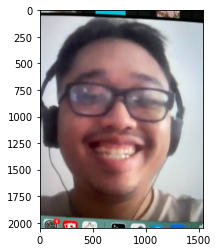

In [ ]:
from matplotlib import image as img
from matplotlib import pyplot as plt
import numpy as np

image = np.array(img.imread("test.jpg"))
plt.imshow (image, cmap='gray', vmin=0, vmax=255)
image_padd = np.zeros((image.shape[0] + 2, image.shape[1] + 2, 3))
image_padd[1:-1, 1:-1] = image
##image_padded = np.pad(image, 1, mode= 'constant')
print(image_padd.shape)

In [ ]:
array = np.ones((3,3))
averaging_filter = np.multiply(array, 1/9)
gauConv = [
[0, 0, 1, 2, 1, 0, 0],
[0, 3, 13, 22, 13, 3, 0],
[1, 13, 59, 97, 59, 13, 1],
[2, 22, 97, 159, 97, 22, 2],
[1, 13, 59, 97, 59, 13, 1],
[0, 3, 13, 22, 13, 3, 0],
[0, 0, 1, 2, 1, 0, 0]
]

def convolve(image, av_filter):

    # Flip the averaging filter
    # av_filter = np.flipud(np.fliplr(av_filter))
    filter_arr = np.array(gauConv)
    filter_arr = filter_arr/255
    print(filter_arr)
    # filter_arr = np.flipud(np.fliplr(filter_arr))
    print(filter_arr.shape)
    # av_filter = np.dstack([filter_arr]*3)
    av_filter = filter_arr
    image_padd = np.zeros((image.shape[0] + 6, image.shape[1] + 6, 3))
    image_padd[3:-3, 3:-3] = image
    print(image_padd.shape)
    # convolution output
    output = np.zeros_like(image_padd)
    
    # Loop over every pixel of the image
    for i in range(image.shape[1]):
        for j in range(image.shape[0]):
            # element-wise multiplication of the kernel and the image
            output[j, i,0]=int((av_filter * image_padd[j: j+7, i: i+7, 0]).sum()/3)
            output[j, i,1]=int((av_filter * image_padd[j: j+7, i: i+7, 1]).sum()/3)
            output[j, i,2]=int((av_filter * image_padd[j: j+7, i: i+7, 2]).sum()/3)

    return output

In [ ]:
image = np.array(img.imread("test.jpg"))
image2 = convolve(image,gauConv)

[[0.         0.         0.00392157 0.00784314 0.00392157 0.
  0.        ]
 [0.         0.01176471 0.05098039 0.08627451 0.05098039 0.01176471
  0.        ]
 [0.00392157 0.05098039 0.23137255 0.38039216 0.23137255 0.05098039
  0.00392157]
 [0.00784314 0.08627451 0.38039216 0.62352941 0.38039216 0.08627451
  0.00784314]
 [0.00392157 0.05098039 0.23137255 0.38039216 0.23137255 0.05098039
  0.00392157]
 [0.         0.01176471 0.05098039 0.08627451 0.05098039 0.01176471
  0.        ]
 [0.         0.         0.00392157 0.00784314 0.00392157 0.
  0.        ]]
(7, 7)
(2054, 1542, 3)


(2054, 1542, 3)
[[[ 98 106 106]
  [155 163 163]
  [173 178 179]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[139 147 147]
  [209 217 217]
  [237 242 243]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[144 152 151]
  [220 228 227]
  [250 255 255]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 ...

 [[143 151 150]
  [220 228 227]
  [251 255 255]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[143 151 150]
  [219 227 226]
  [251 255 255]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[143 151 150]
  [219 227 226]
  [251 255 255]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]]


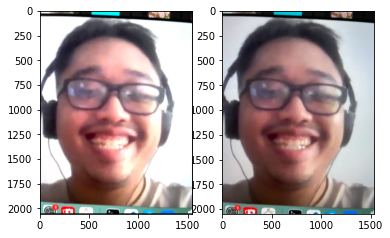

In [ ]:

import cv2
cv2.imwrite('out.jpg', image2)
img_out =cv2.imread('out.jpg')

fig = plt.figure()
ax1 = fig.add_subplot(1,2,2)
ax1.imshow(image)
ax2 = fig.add_subplot(1,2,1)
ax2.imshow(img_out)

print(img_out.shape)
print(img_out[:10][:10])